In [7]:
# step 8 : cluster assignment
import pandas as pd
from sklearn.cluster import KMeans


X_scaled = pd.read_csv("C:\\Users\\User\\.vscode\\APP USER BEHAVIOR SEGMENTATION SYSTEM\\data\\scaled_features.csv")

df = pd.read_csv("C:\\Users\\User\\.vscode\\APP USER BEHAVIOR SEGMENTATION SYSTEM\\data\\cleaned_data.csv")

k = 4


kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)

df['cluster'] = kmeans.fit_predict(X_scaled)
print(df['cluster'].value_counts())



cluster
3    15167
2    14724
0    11716
1     8393
Name: count, dtype: int64


In [8]:
# cluster profiling

cluster_profile = (
    df
    .groupby('cluster')
    .agg({
        'engagement_score': 'mean',
        'churn_risk_score': 'mean',
        'sessions_per_week' : 'sum',
        'avg_session_duration_min' : 'mean',
        'daily_active_minutes' : 'mean',
        'feature_clicks_per_session' : 'sum',
        'in_app_search_count' : 'sum',
        'pages_viewed_per_session' : 'sum',
        'notifications_opened_per_week' : 'sum',
        'content_downloads' : 'sum',
        'social_shares' : 'sum',
        'rating_given' : 'sum'

    })
)

print(cluster_profile)


         engagement_score  churn_risk_score  sessions_per_week  \
cluster                                                          
0               64.939334          0.506661              93526   
1               64.841125          0.498885              67344   
2               64.949150          0.501902             118845   
3               64.987693          0.496376             120269   

         avg_session_duration_min  daily_active_minutes  \
cluster                                                   
0                       13.038483             44.993354   
1                       13.205416             45.113927   
2                       13.093237             45.093480   
3                       13.260061             45.393757   

         feature_clicks_per_session  in_app_search_count  \
cluster                                                    
0                            140521                46971   
1                            100372                33580   
2       

In [9]:
# assign cluster labels 

cluster_labels = {
    3: 'high_engagement_users',
    2: 'moderate_engagement_users',
    0: 'low_engagement_users',
    1: 'occasional_users'
}

df['user_category'] = df['cluster'].map(cluster_labels)
print(df[['user_id', 'cluster', 'user_category']].head())
print(df['user_category'].value_counts())

   user_id  cluster              user_category
0   100000        0       low_engagement_users
1   100001        2  moderate_engagement_users
2   100002        0       low_engagement_users
3   100003        3      high_engagement_users
4   100004        2  moderate_engagement_users
user_category
high_engagement_users        15167
moderate_engagement_users    14724
low_engagement_users         11716
occasional_users              8393
Name: count, dtype: int64


In [10]:
df.to_csv("C:\\Users\\User\\.vscode\\APP USER BEHAVIOR SEGMENTATION SYSTEM\\outputs\\final_clustered_df.csv", index=False)

In [11]:
cluster_3_high = df[df['cluster'] == 3]
cluster_2_moderate = df[df['cluster'] == 2]
cluster_0_low = df[df['cluster'] == 0]
cluster_1_occasional = df[df['cluster'] == 1]

cluster_3_high.to_csv("C:\\Users\\User\\.vscode\\APP USER BEHAVIOR SEGMENTATION SYSTEM\\outputs\\cluster_3_high.csv", index=False)
cluster_2_moderate.to_csv("C:\\Users\\User\\.vscode\\APP USER BEHAVIOR SEGMENTATION SYSTEM\\outputs\\cluster_2_moderate.csv", index=False)
cluster_0_low.to_csv("C:\\Users\\User\\.vscode\\APP USER BEHAVIOR SEGMENTATION SYSTEM\\outputs\\cluster_0_low.csv", index=False)
cluster_1_occasional.to_csv("C:\\Users\\User\\.vscode\\APP USER BEHAVIOR SEGMENTATION SYSTEM\\outputs\\cluster_1_occasional.csv", index=False)


c:\Users\User\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


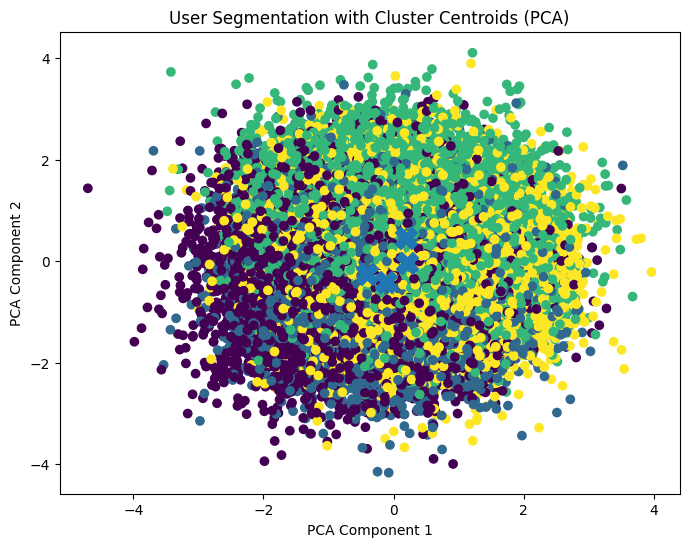

In [12]:
# PCA visualization

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

centroids_pca = pca.transform(kmeans.cluster_centers_)

# plot users
plt.figure(figsize=(8, 6))
plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=df['cluster']
)

# Plot centroids
plt.scatter(
    centroids_pca[:, 0],
    centroids_pca[:, 1],
    marker='X',
    s=250
)

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("User Segmentation with Cluster Centroids (PCA)")
plt.show()

# save image
plt.savefig("C:\\Users\\User\\.vscode\\APP USER BEHAVIOR SEGMENTATION SYSTEM\\outputs\\pca_visual.png", dpi=300,bbox_inches='tight')
plt.close()